In [1]:
import torch
from lavis.models import load_model_and_preprocess
import pandas as pd
import os
from PIL import Image
import logging
import argparse
from torch.utils.data import Dataset
from tqdm import tqdm
import torch.utils.data as data

/homes/yg007/ooc_detection/venv_py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import pandas as pd

val_feather_path = '../raw_data/mini_toy_completed_exist_rephrased.feather'
val_df = pd.read_feather(val_feather_path)  # already drop the non-exists

val_df

,id,full_text,image_id,filename,falsified,topic,exists,rephrased_gpt4
0,1420374023578427395,Speaker Pelosi and Senate Maj Leader Schumer t...,1420374023578427395,25/1420374023578427395-1420373830791352325.png,False,cross_topic_random,True,Speaker Pelosi and Senator Majority Leader Sch...
1,968827004924637184,Russia and China continue to unabashedly copy ...,1269689580430807041,74/1269689580430807041-1269689577071132674.jpg,True,military_hard,True,Russia and China persist in their blatant imit...
2,1422331634947436544,“Coal powered the industrial revolution two hu...,1019424046562402304,16/1019424046562402304-1019424021484527616.jpg,True,cross_topic_random,True,"""Two centuries ago, coal was the driving force..."
3,1413018660562784256,Join us today and tomorrow for a riveting disc...,1405085463975809025,89/1405085463975809025-1405085447370559489.jpg,True,climate_random,True,Be a part of our engaging conversation regardi...
4,1424275072412360714,"Britain needs big ideas for big problems, but ...",1426534869270769665,54/1426534869270769665-1426534867374850054.jpg,True,cross_topic_random,True,The UK is in need of substantial solutions for...
...,...,...,...,...,...,...,...,...
495,1410684821140037633,Top court tells France to do more to fight cli...,1400577913657847812,67/1400577913657847812-1400577720883441667.png,True,climate_random,True,The supreme judicial body has ordered France t...
496,1427247782440615938,Geauga County Health Commissioner (Ohio) wants...,1427247782440615938,02/1427247782440615938-1427247778263142402.jpg,False,covid_hard,True,"The Health Commissioner for Geauga County, Ohi..."
497,1403442838734577666,So where is Wee Greta ranting about this? Can ...,1403442838734577666,68/1403442838734577666-1403442836171808768.jpg,False,cross_topic_random,True,Where is Wee Greta vocally protesting this mat...
498,1424285778163769344,experts warn say Soon pipo no go fit live for ...,1424285778163769344,68/1424285778163769344-1424285766461575168.jpg,False,climate_random,True,"Experts caution that in the near future, Lagos..."


In [2]:
from lavis.models import model_zoo
print(model_zoo)

Architectures                  Types
albef_classification           ve
albef_feature_extractor        base
albef_nlvr                     nlvr
albef_pretrain                 base
albef_retrieval                coco, flickr
albef_vqa                      vqav2
alpro_qa                       msrvtt, msvd
alpro_retrieval                msrvtt, didemo
blip_caption                   base_coco, large_coco
blip_classification            base
blip_feature_extractor         base
blip_image_text_matching       base, large
blip_nlvr                      nlvr
blip_pretrain                  base
blip_retrieval                 coco, flickr
blip_vqa                       vqav2, okvqa, aokvqa
blip2_opt                      pretrain_opt2.7b, pretrain_opt6.7b, caption_coco_opt2.7b, caption_coco_opt6.7b
blip2_t5                       pretrain_flant5xl, pretrain_flant5xl_vitL, pretrain_flant5xxl, caption_coco_flant5xl
blip2_feature_extractor        pretrain, pretrain_vitL, coco
blip2                      

In [3]:
# Logger
logger = logging.getLogger()
logging.basicConfig(
    level=os.environ.get("LOGLEVEL", "INFO"),
    format="[%(asctime)s]:[%(processName)-11s]" + "[%(levelname)-s]:[%(name)s] %(message)s",
)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# blip2 captioning
model, vis_processors, _ = load_model_and_preprocess(name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device)

Position interpolate from 16x16 to 26x26


Loading checkpoint shards: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.72s/it]
[2023-11-07 06:47:58,943]:[MainProcess][INFO]:[timm.models.hub] Downloading: "https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP2/blip2_caption_flant5xl.pth" to /homes/yg007/.cache/torch/hub/checkpoints/blip2_caption_flant5xl.pth

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.07G/4.07G [02:23<00:00, 30.5MB/s]
[2023-11-07 06:50:28,517]:[MainProcess][INFO]:[root] Missing keys ['t5_model.shared.weight', 't5_model.encoder.embed_tokens.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.q.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.k.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.v.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.o.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.relative_

[2023-11-07 06:50:28,518]:[MainProcess][INFO]:[root] load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP2/blip2_caption_flant5xl.pth


In [4]:
# blip captioning
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="base_coco", is_eval=True, device=device)

[2023-11-06 08:03:18,641]:[MainProcess][INFO]:[root] Missing keys []
[2023-11-06 08:03:18,645]:[MainProcess][INFO]:[root] load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP/blip_coco_caption_base.pth


In [2]:
val_feather_path = '../raw_data/val_completed_exist.feather'
val_df = pd.read_feather(val_feather_path)  # already drop the non-exists
val_img_dir = '/import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids'

In [2]:
toy_feather_path = '../raw_data/toy_completed_exist.feather'
toy_df = pd.read_feather(toy_feather_path)  # already drop the non-exists
toy_img_dir = '/import/network-temp/yimengg/data/twitter-comms/train/images/train_image_ids'

In [3]:
item = val_df.iloc[16010]
text = item['full_text']  # original caption

img_filename = item['filename']
image_path = os.path.join(val_img_dir, img_filename)

raw_image = Image.open(image_path).convert('RGB')
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
# generate caption
generated_text = model.generate({"image": image, "prompt": "Question: Could you describe the image in detail? Answer:"}, repetition_penalty=5.0, length_penalty=2.0)
# ['a large fountain spewing water into the air']
print(f"Generated caption:\n{generated_text}")
print(f"Original text:\n{text}")
print("Input image:")
display(raw_image.resize((300, 200)))
print(f"Falsified: {item['falsified']}")

NameError: name 'vis_processors' is not defined

[Image]:


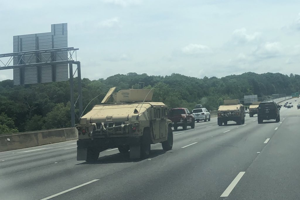

[Text]:
Russia and China continue to unabashedly copy military vehicle designs. These pictures are *not* of a Black Hawk, CB90 or A400M...

(Z-20, Project 03160 and suspected Y-30) https://t.co/vRZtzwxHgn

[Falsified]: True

[Image Path]: /import/network-temp/yimengg/data/twitter-comms/train/images/train_image_ids/74/1269689580430807041-1269689577071132674.jpg



In [5]:
item = toy_df.iloc[1]
text = item['full_text']  # original caption

img_filename = item['filename']
image_path = os.path.join(toy_img_dir, img_filename)

raw_image = Image.open(image_path).convert('RGB')
print(f"[Image]:")
display(raw_image.resize((300, 200)))
print(f"[Text]:\n{text}\n")
print(f"[Falsified]: {item['falsified']}\n")
# print(f"[Llava Prediction]: {item['llava_output']}\n")
# print(f"[Llava Advanced Prompt Prediction]: {item['llava_advanced_prompt_output']}\n")
print(f"[Image Path]: {image_path}\n")

In [2]:
val_feather_path = '../raw_data/val_completed_exist_with_llava_outputs.feather'
val_df = pd.read_feather(val_feather_path)  # already drop the non-exists
val_img_dir = '/import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids'

In [23]:
val_df.iloc[12][['full_text', 'falsified', 'llava_output', 'llava_advanced_prompt_output']]

full_text                       White House: Climate among "root causes" of mi...
falsified                                                                   False
llava_output                                                                 True
llava_advanced_prompt_output                                                False
Name: 12, dtype: object

In [15]:
labels = val_df['falsified'].tolist()

In [16]:
preds = val_df['llava_advanced_prompt_output'].tolist()

In [17]:
correct = 0
for i in range(22082):
    if labels[i] == preds[i]:
        correct += 1

print(correct)

11665
